In [362]:
import pandas as pd
import numpy as np                  # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings  
import statistics
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing, cross_validation, svm,neighbors
from sklearn.cluster import MeanShift
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# model =LinearDiscriminantAnalysis()
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))


train=pd.read_csv('train.csv')
bold('**Our train data:**')
display(train.head())

test=pd.read_csv('test.csv')
train_original=train.copy()
test_original=test.copy()



**Our train data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [363]:
data_cleaner=[train, test]

**Cross Tab sex:**

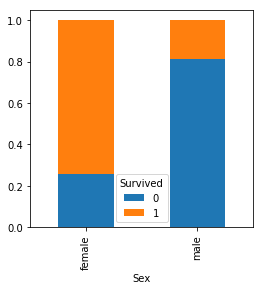

In [364]:
bold('**Cross Tab sex:**')
Gender=pd.crosstab(train['Sex'],train['Survived'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [365]:
for dataset in data_cleaner:
    dataset=dataset.drop(['Cabin'],1,inplace=True)

In [366]:
for dataset in data_cleaner:
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Age'].median(), inplace = True)
    
#     train[(train['Age'])<1].replace()

#quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
#     dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

#     dataset['Title'].replace('Mr',0,inplace=True)
#     dataset['Title'].replace('Mrs',1,inplace=True)
#     dataset['Title'].replace('Miss',2,inplace=True)
#     dataset['Title'].replace('Master',3,inplace=True)
#     dataset['Title'].replace('Dr',4,inplace=True)
#     dataset['Title'].replace('Rev',5,inplace=True)
#     dataset['Title'].replace('Col',6,inplace=True)
#     dataset['Title'].replace('Major',7,inplace=True)
#     dataset['Title'].replace('Mlle',8,inplace=True)
#     dataset['Title'].replace('Don',9,inplace=True)
#     dataset['Title'].replace('Jonkheer',10,inplace=True)
#     dataset['Title'].replace('Capt',11,inplace=True)
#     dataset['Title'].replace('Ms',12,inplace=True)
#     dataset['Title'].replace('the Countess',13,inplace=True)
#     dataset['Title'].replace('Sir',14,inplace=True)
#     dataset['Title'].replace('Mme',15,inplace=True)
#     dataset['Title'].replace('Lady',16,inplace=True)
#     dataset['Title'].replace('Dona',17,inplace=True)



In [367]:
train.replace([0.83,0.92,0.75,0.67,0.42],[1,1,1,1,1],inplace=True)
train[(train['Age'])<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [368]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [369]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked'] = label.fit_transform(dataset['Embarked'])
#     dataset['Title'] = label.fit_transform(dataset['Title'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [370]:
train['Age_n'] = (train['Age'] - 29.361582) / 79

In [371]:
train=train.drop(['Name','Ticket','PassengerId','Fare','Age'],1)
test=test.drop(['Name','Ticket','PassengerId','Fare','Age'],1)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_n
0,0,3,1,1,0,2,-0.093185
1,1,1,0,1,0,0,0.109347
2,1,3,0,0,0,2,-0.042552
3,1,1,0,1,0,2,0.071372
4,0,3,1,0,0,2,0.071372


In [372]:
model = MeanShift()
model.fit(train)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [373]:
labels = model.labels_
cluster_centers = model.cluster_centers_

In [374]:
train['cluster_group']=np.nan

In [375]:
for i in range(len(train)):
    train['cluster_group'].iloc[i] = labels[i]

C:\Users\sushant\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [376]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = train[ (train['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['Survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.3433734939759036, 1: 0.656934306569343, 2: 0.2459016393442623, 3: 0.2857142857142857, 4: 0.0, 5: 0.625}


In [377]:
display(train[ (train['cluster_group']==0) ])

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_n,cluster_group
0,0,3,1,1,0,2,-0.093185,0.0
2,1,3,0,0,0,2,-0.042552,0.0
3,1,1,0,1,0,2,0.071372,0.0
4,0,3,1,0,0,2,0.071372,0.0
5,0,3,1,0,0,1,-0.017235,0.0
6,0,1,1,0,0,2,0.311879,0.0
8,1,3,0,0,2,2,-0.029893,0.0
10,1,3,0,1,1,2,-0.321033,0.0
11,1,1,0,0,0,2,0.362512,0.0
12,0,3,1,0,0,2,-0.118501,0.0


In [378]:
display(train[ (train['cluster_group']==1) ])

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_n,cluster_group
1,1,1,0,1,0,0,0.109347,1.0
9,1,2,0,1,0,0,-0.194450,1.0
19,1,3,0,0,0,0,-0.017235,1.0
30,0,1,1,0,0,0,0.134664,1.0
31,1,1,0,1,0,0,-0.017235,1.0
34,0,1,1,1,0,0,-0.017235,1.0
36,1,3,1,0,0,0,-0.017235,1.0
39,1,3,0,1,0,0,-0.194450,1.0
43,1,2,0,1,2,0,-0.333691,1.0
52,1,1,0,1,0,0,0.248588,1.0


In [379]:
display(train[ (train['cluster_group']==2) ])

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_n,cluster_group
7,0,3,1,3,1,2,-0.346349,2.0
16,0,3,1,4,1,1,-0.346349,2.0
24,0,3,0,3,1,2,-0.270400,2.0
27,0,1,1,3,2,2,-0.131159,2.0
38,0,3,0,2,0,2,-0.143817,2.0
48,0,3,1,2,0,0,-0.017235,2.0
50,0,3,1,4,1,2,-0.283058,2.0
59,0,3,1,5,2,2,-0.232425,2.0
63,0,3,1,3,2,2,-0.321033,2.0
68,1,3,0,4,2,2,-0.156476,2.0


In [380]:
cluster_0 = (train[ (train['cluster_group']==0) ])
cluster_0_fc = (cluster_0[ (cluster_0['Pclass']==1) ])
display(cluster_0_fc.describe())

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_n,cluster_group
count,118.000000,118.0,118.000000,118.000000,118.000000,118.0,118.000000,118.0
mean,0.584746,1.0,0.627119,0.322034,0.220339,2.0,0.110795,0.0
std,0.494867,0.0,0.485633,0.504363,0.508653,0.0,0.173437,0.0
min,0.000000,1.0,0.000000,0.000000,0.000000,2.0,-0.321033,0.0
25%,0.000000,1.0,0.000000,0.000000,0.000000,2.0,-0.017235,0.0
50%,1.000000,1.0,1.000000,0.000000,0.000000,2.0,0.084031,0.0
75%,1.000000,1.0,1.000000,1.000000,0.000000,2.0,0.223271,0.0
max,1.000000,1.0,1.000000,2.000000,2.000000,2.0,0.640993,0.0
